### Doctor's Consultation Prediction

In [355]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [356]:
data = pd.read_excel("Fee_Final_Train.xlsx")

In [357]:
data = pd.DataFrame(data)

In [358]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


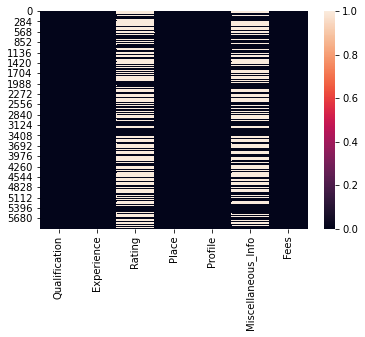

In [359]:
sns.heatmap(data.isnull())

In [360]:
data.shape

(5961, 7)

In [361]:
data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [362]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [363]:
#There are null values in Rating, place and MIscellanious columns

In [364]:
#converting Experience column to numbers
data['Experience'] = data.Experience.str.split("years experience",expand=True,)[0]

In [365]:
#fill null values with "Nan%" to extract numbers from the column
data.Rating.fillna("NaN%")

0       100%
1        98%
2       NaN%
3       NaN%
4       100%
        ... 
5956     98%
5957    NaN%
5958     97%
5959     90%
5960    100%
Name: Rating, Length: 5961, dtype: object

In [366]:
#Rating column is converted to numbers
data['Rating'] = data.Rating.str.split("%",expand=True,)[0]

In [367]:
#replace missing values in rating with median value
data.Rating.replace(np.nan,0, inplace=True)

In [368]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [369]:
#since around 50% data is missing in Miscellaneous_Info column, so we are droping it, 
#most of the data in misc info is also in rating and address
#even replacing mode is not good because most of the values are different
data.drop("Miscellaneous_Info", inplace=True, axis=1)
data.dropna(inplace=True)

In [370]:
data.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [371]:
data.shape

(5936, 6)

In [372]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250


In [373]:
#splitting Place to place and city
data[['place','city']] = data.Place.str.split(",",expand=True,).iloc[:,0:2]

In [374]:
data.drop("Place", inplace=True, axis=1)

In [375]:
data["Qualification"]=data["Qualification"].str.split(",")
qualifictn ={}
for x in data["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in qualifictn:
            qualifictn[each]+=1
        else:
            qualifictn[each]=1

In [376]:
qualifictn

{'BHMS': 749,
 'MD - Homeopathy': 181,
 'BAMS': 764,
 'MD - Ayurveda Medicine': 139,
 'MBBS': 2807,
 'MS - Otorhinolaryngology': 103,
 'BSc - Zoology': 3,
 'BDS': 1363,
 'MD - General Medicine': 285,
 'BSc': 3,
 'MS': 2,
 'DNB - ENT': 111,
 'MDS': 82,
 'MDS - Oral & Maxillofacial Surgery': 104,
 'Diploma in Otorhinolaryngology (DLO)': 250,
 'MF- Homeopathy': 5,
 'MS - ENT': 411,
 'DNB': 58,
 'Fellowship of College of General Practice (FCGP)': 13,
 'DDVL': 160,
 'IBCLC (USA)': 1,
 'Post Graduate Diploma in Diabetology (PGDD)': 53,
 'Diploma in Dermatology': 67,
 'Fellowship in Aesthetic Medicine': 23,
 'DM - Neurology': 6,
 'MD - Pediatrics': 13,
 'Fellowship in Cleft Lip and Craniofacial Surgery': 1,
 'Diploma in Cosmetology': 3,
 'AFIH': 4,
 'MDS - Prosthodontist And Crown Bridge': 45,
 'M. D. Hom. (Practice of Medicine)': 2,
 'Diploma in Emergency Medicine': 8,
 'Diploma in Counselling Skills': 2,
 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47,
 'MD - Dermatology': 606,
 '

In [378]:
most_qualifn = sorted(qualifictn.items(),key=lambda x:x[1],reverse=True)[:10]
final_qualifn = []
for qual in most_qualifn:
    final_qualifn.append(qual[0])

In [379]:
final_qualifn

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy']

In [380]:
for qual in final_qualifn:
    data[qual] = 0

for x,y in zip(data['Qualification'].values, np.array([i for i in range(len(data))])):
    for c in x:
        c = c.strip()
        if c in final_qualifn:
            data[c][y] = 1

In [381]:
data.head()

,Qualification,Experience,Rating,Profile,Fees,place,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,100,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,98,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,100,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [233]:
data.Profile.nunique()

6

In [383]:
data

,Qualification,Experience,Rating,Profile,Fees,place,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,100,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,98,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,100,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"[MBBS, MS - ENT]",19,98,ENT Specialist,300,Basavanagudi,Bangalore,0,0,0,0,0,0,0,0,0,0
5957,[MBBS],33,0,General Medicine,100,Nungambakkam,Chennai,0,0,0,0,0,0,0,0,0,0
5958,[MBBS],41,97,General Medicine,600,Greater Kailash Part 2,Delhi,0,0,0,0,0,0,0,0,0,0
5959,"[MBBS, MD - General Medicine]",15,90,General Medicine,100,Vileparle West,Mumbai,0,0,0,0,0,0,0,0,0,0


In [384]:
data.drop(["Qualification"], inplace=True, axis=1)

In [385]:
data

,Experience,Rating,Profile,Fees,place,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,Basavanagudi,Bangalore,0,0,0,0,0,0,0,0,0,0
5957,33,0,General Medicine,100,Nungambakkam,Chennai,0,0,0,0,0,0,0,0,0,0
5958,41,97,General Medicine,600,Greater Kailash Part 2,Delhi,0,0,0,0,0,0,0,0,0,0
5959,15,90,General Medicine,100,Vileparle West,Mumbai,0,0,0,0,0,0,0,0,0,0


In [386]:
data

,Experience,Rating,Profile,Fees,place,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,Basavanagudi,Bangalore,0,0,0,0,0,0,0,0,0,0
5957,33,0,General Medicine,100,Nungambakkam,Chennai,0,0,0,0,0,0,0,0,0,0
5958,41,97,General Medicine,600,Greater Kailash Part 2,Delhi,0,0,0,0,0,0,0,0,0,0
5959,15,90,General Medicine,100,Vileparle West,Mumbai,0,0,0,0,0,0,0,0,0,0


In [387]:
data["Experience"] = data["Experience"].apply(pd.to_numeric)

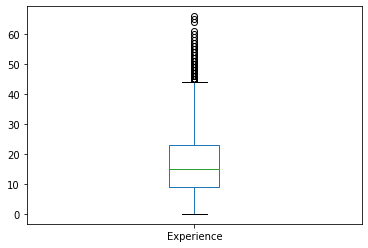

In [388]:
data.Experience.plot(kind="box")

In [389]:
data["Rating"] = data["Rating"].apply(pd.to_numeric)

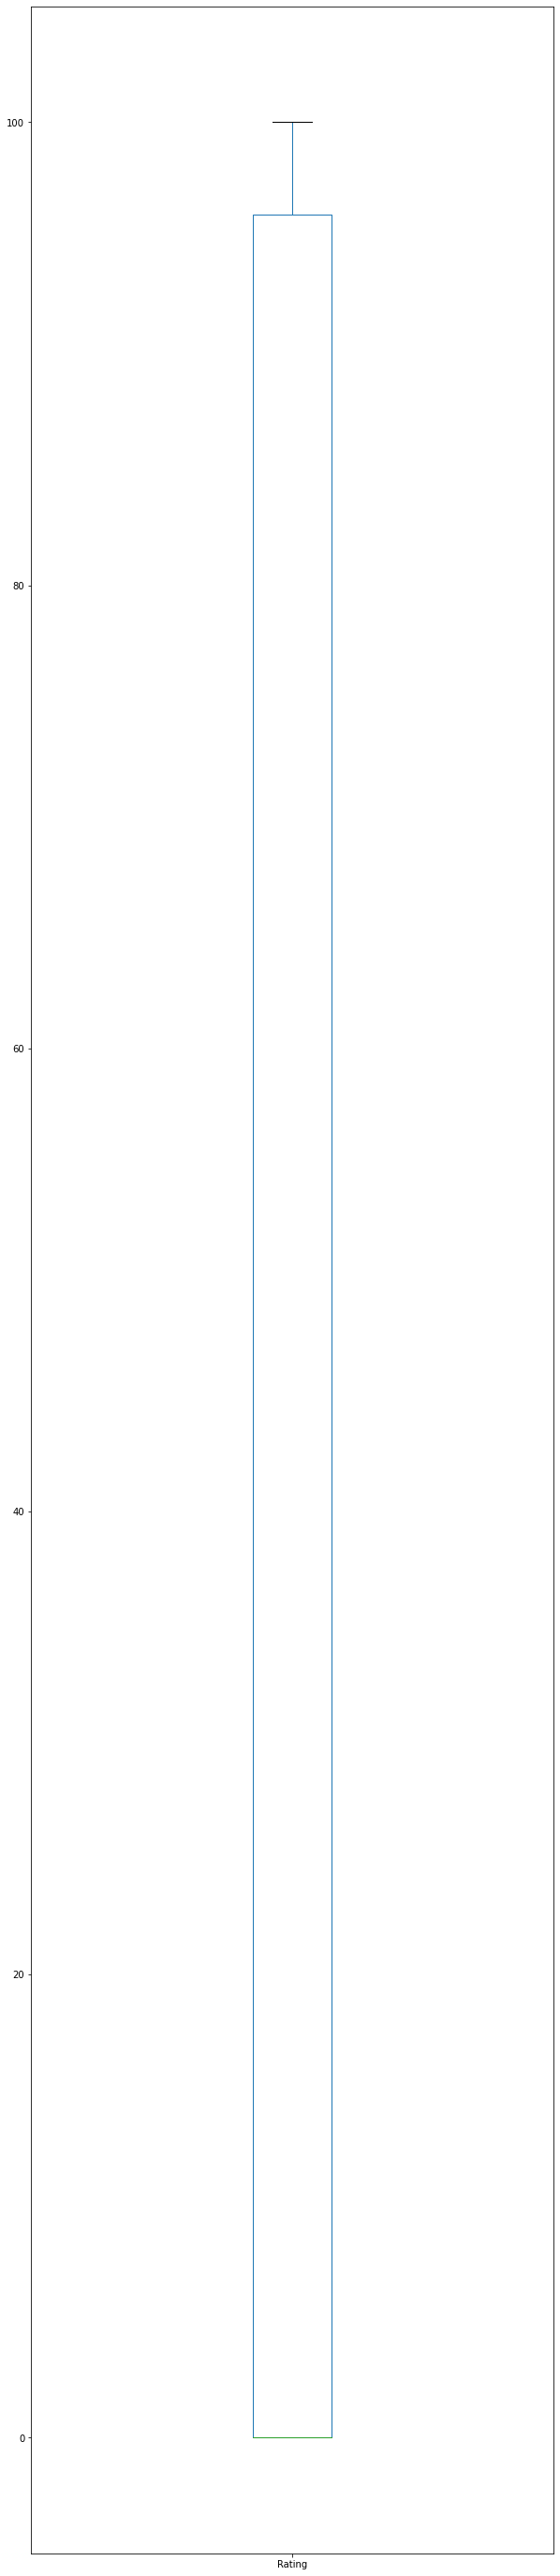

In [390]:
plt.figure(figsize=(10,50))
data.Rating.plot(kind="box")

In [393]:
data.skew()

Experience                               1.000280
Rating                                   0.239630
Fees                                     0.747545
MBBS                                     4.689783
BDS                                      6.162967
BAMS                                    22.179208
BHMS                                     8.916103
MD - Dermatology                         9.554008
MS - ENT                                12.218314
Venereology & Leprosy                    4.161738
MD - General Medicine                    4.229367
Diploma in Otorhinolaryngology (DLO)     4.570963
MD - Homeopathy                          5.462793
dtype: float64

In [394]:
#There are skews in every column

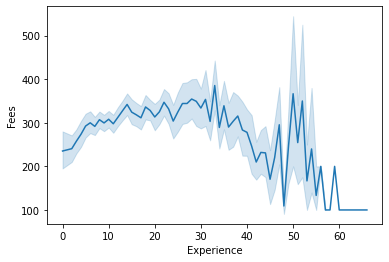

In [395]:
sns.lineplot(data.Experience, data.Fees)

In [396]:
#maximum fees for the doctors who has experience between 30-40 years

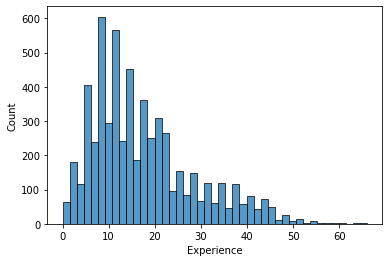

In [397]:
sns.histplot(data.Experience)

In [398]:
#more doctors hass experience between 5-15 years

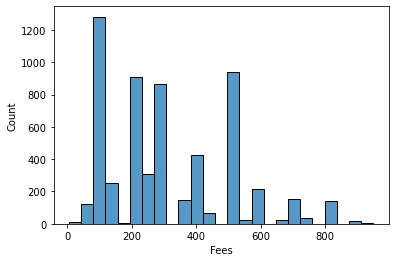

In [399]:
sns.histplot(data.Fees)

In [400]:
#in most of the places, fee is around 100

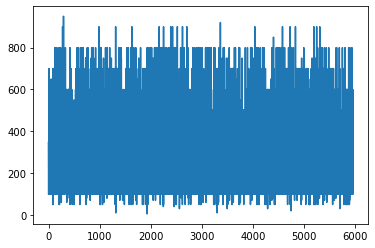

In [401]:
data.Fees.plot()

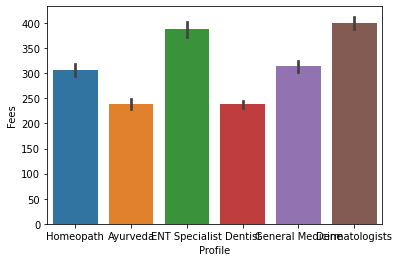

In [402]:
sns.barplot(x="Profile",y="Fees", data=data)

In [403]:
#When experience increasing, rate of change of fees is higher in dentists

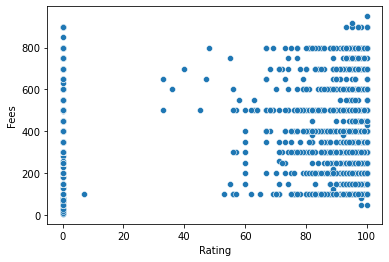

In [404]:
sns.scatterplot(data.Rating, data.Fees)

In [405]:
#rating is not pretty much related to the fee

In [406]:
data.city.nunique()

9

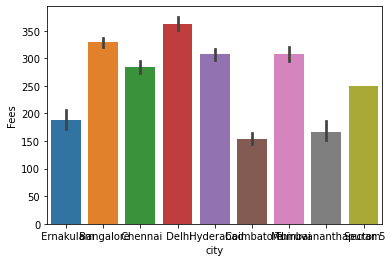

In [407]:
sns.barplot(x="city",y="Fees", data=data)

In [408]:
#large cities have higher fees

In [409]:
data.drop(["place"],inplace=True, axis=1)

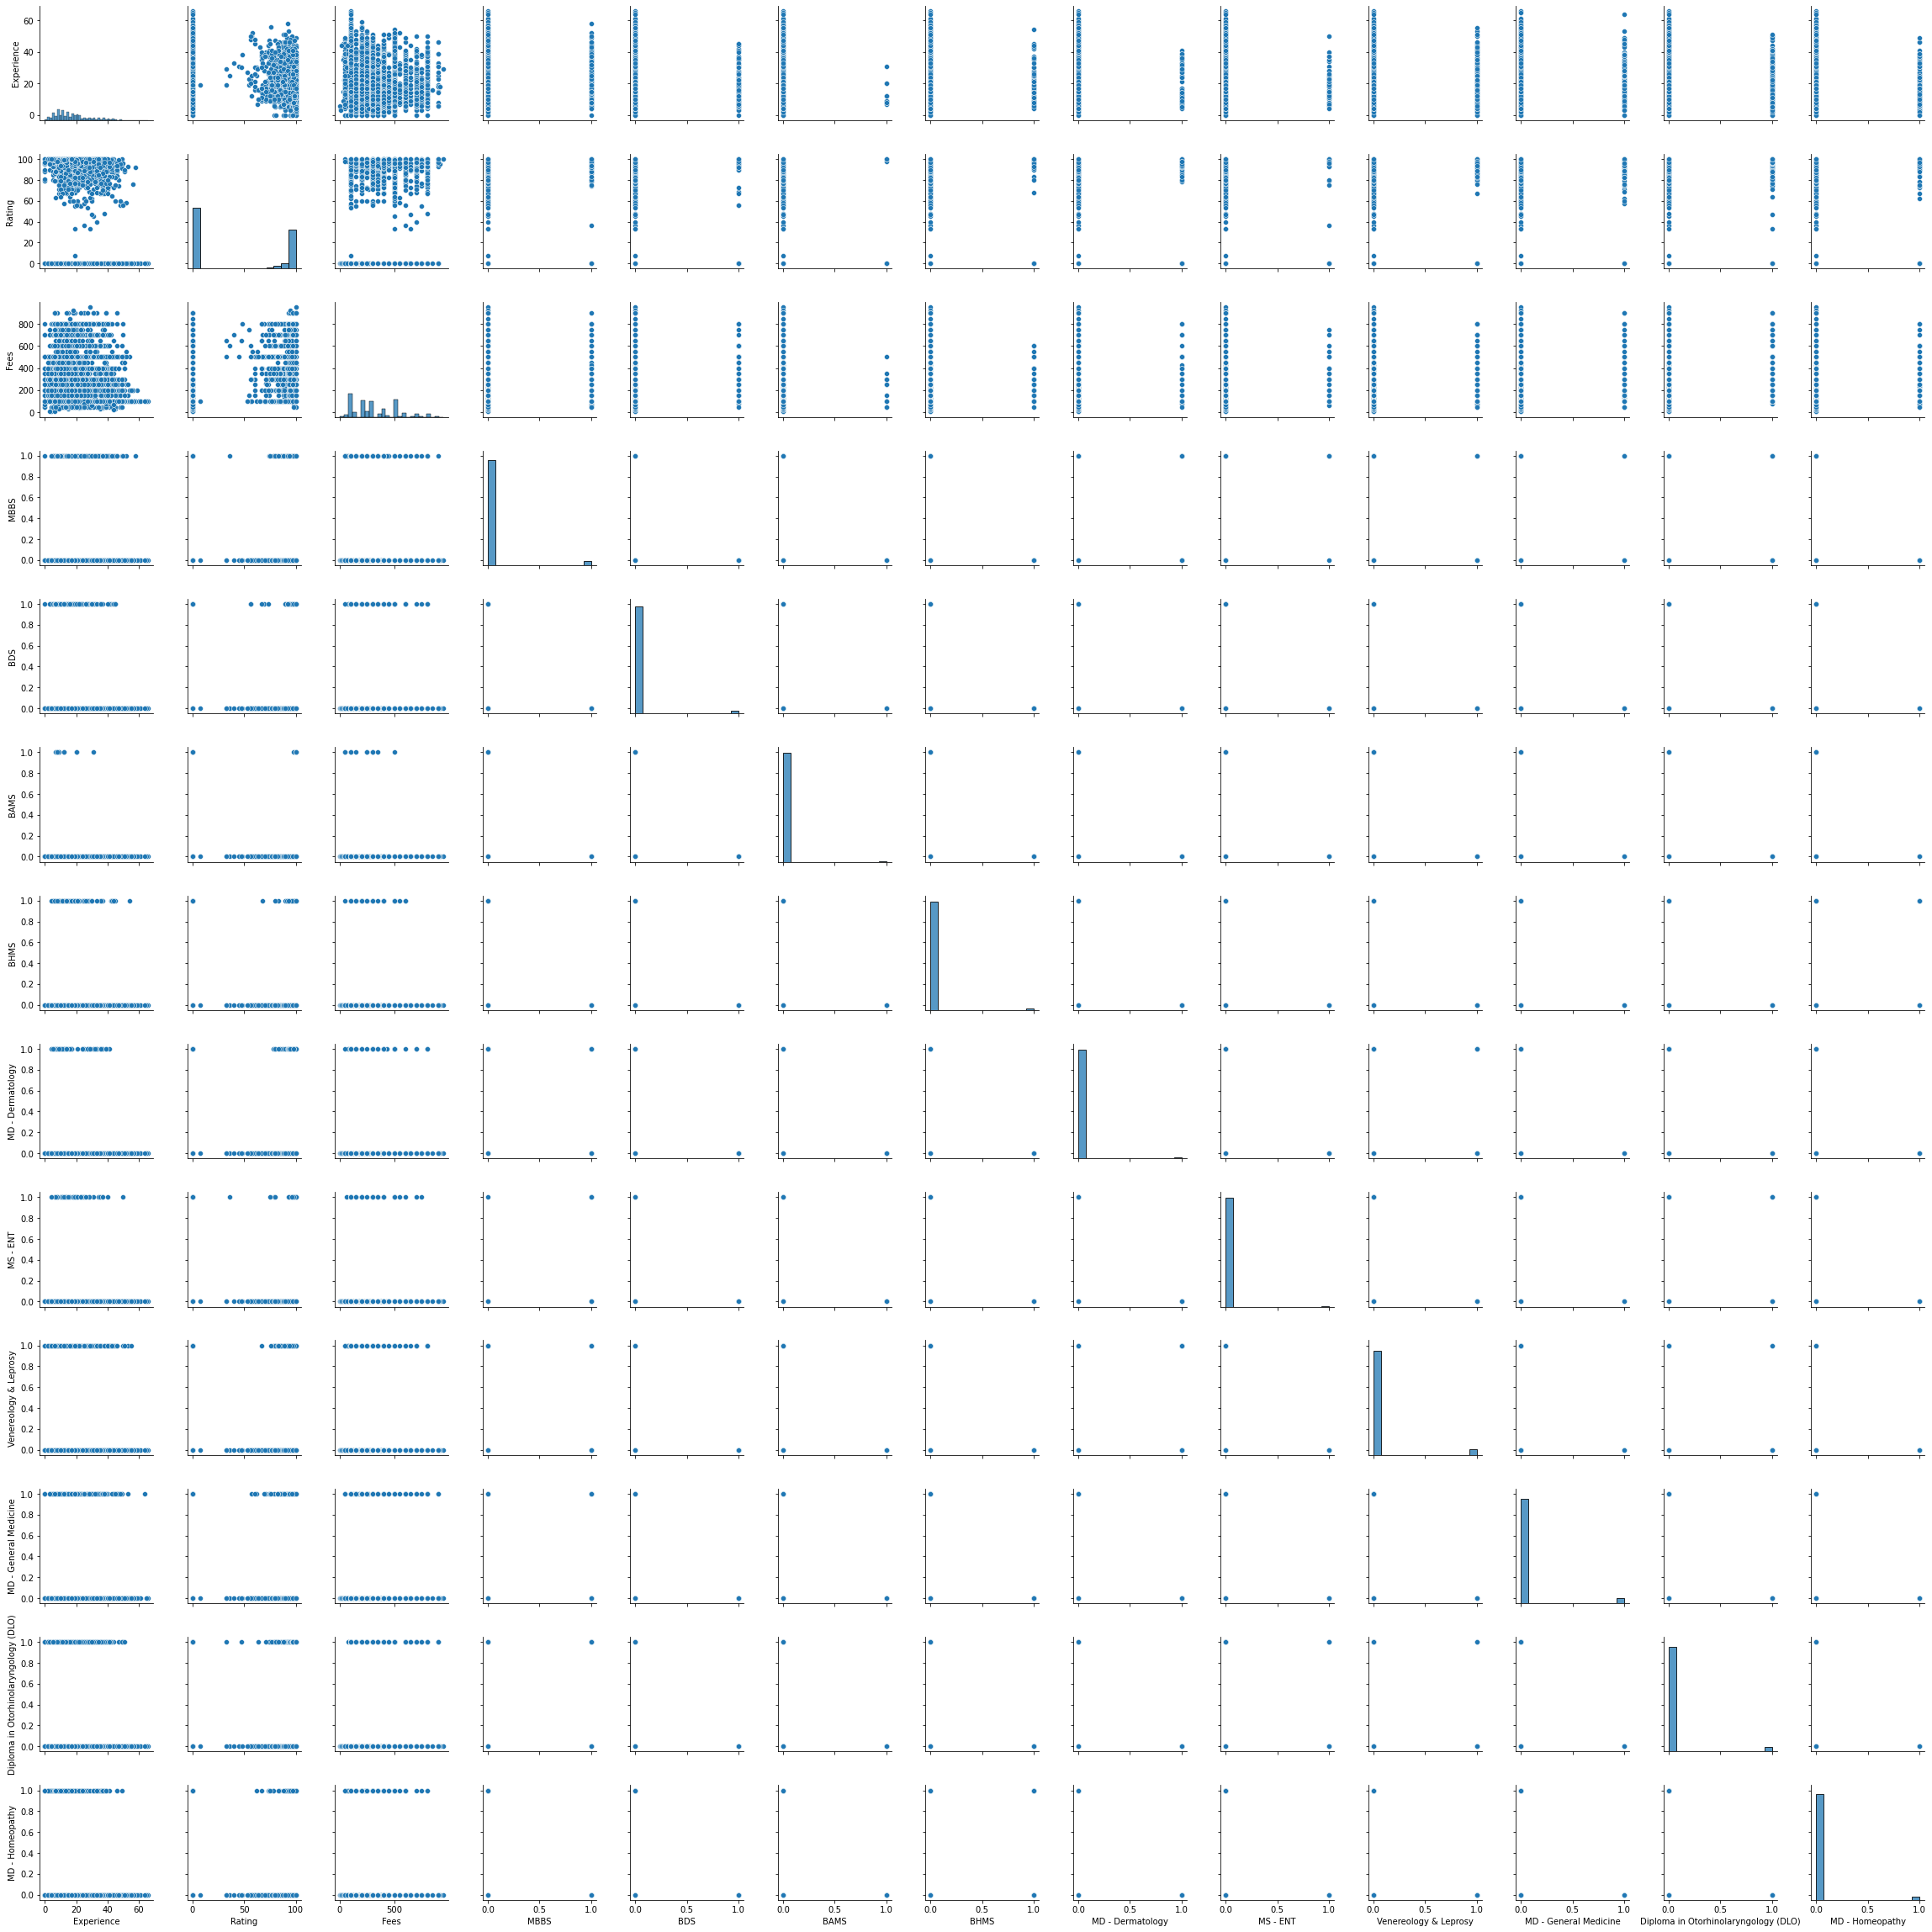

In [413]:
sns.pairplot(data)

In [414]:
from sklearn.preprocessing import LabelEncoder

In [415]:
data.head()

,Experience,Rating,Profile,Fees,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


In [416]:
data.city.fillna(str(data.city.mode()),inplace=True)

In [418]:
#encoding
columns = ["Profile", "city"]
for i in columns:
    try:
        le = LabelEncoder()
        le.fit(data[i])
        data[i] = le.transform(data[i])
    except Exception as e:
        print(str(e))

In [419]:
data.head()

,Experience,Rating,Profile,Fees,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,5,100,4,0,0,0,1,0,0,0,0,0,1
1,12,98,0,350,0,0,0,1,0,0,0,0,0,0,0
2,9,0,3,300,0,1,0,0,0,0,0,0,0,0,0
3,12,0,0,250,0,0,0,1,0,0,0,0,0,0,0
4,20,100,0,250,1,0,0,1,0,0,0,0,0,0,0


In [420]:
from sklearn.preprocessing import power_transform

In [421]:
data.skew()

Experience                               1.000280
Rating                                   0.239630
Profile                                  0.105341
Fees                                     0.747545
city                                     0.047463
MBBS                                     4.689783
BDS                                      6.162967
BAMS                                    22.179208
BHMS                                     8.916103
MD - Dermatology                         9.554008
MS - ENT                                12.218314
Venereology & Leprosy                    4.161738
MD - General Medicine                    4.229367
Diploma in Otorhinolaryngology (DLO)     4.570963
MD - Homeopathy                          5.462793
dtype: float64

In [434]:
columns = ["Experience", "Rating"]
for i in columns:
    data[i] = power_transform(np.array(data[i]).reshape(-1,1))

In [435]:
data.dtypes

Experience                              float64
Rating                                  float64
Profile                                   int32
Fees                                      int64
city                                      int32
MBBS                                      int64
BDS                                       int64
BAMS                                      int64
BHMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

In [436]:
data.head()

,Experience,Rating,Profile,Fees,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,0.743252,1.128679,5,100,4,0,0,0,1,0,0,0,0,0,1
1,-0.323784,1.122399,0,350,0,0,0,1,0,0,0,0,0,0,0
2,-0.699362,-0.900527,3,300,0,1,0,0,0,0,0,0,0,0,0
3,-0.323784,-0.900527,0,250,0,0,0,1,0,0,0,0,0,0,0
4,0.439285,1.128679,0,250,1,0,0,1,0,0,0,0,0,0,0


In [437]:
x = data.loc[:,data.columns != "Fees"]

In [438]:
y = data.iloc[:,3]

In [448]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [458]:
# calculate RMSLE.
def acc_score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [459]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    ac = acc_score(y_test, pred)
    if ac > max_acc:
        max_acc = r2
        max_rs = i
print("Best random state=",max_rs)

Best random state= 199


In [460]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 199)

In [461]:
models = {"SVR":SVR(),"KNN":KNeighborsRegressor(), "RandomForest":RandomForestRegressor(),"LinearRegression":LinearRegression(), "Ridge":Ridge(), "dtr":DecisionTreeRegressor() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    #mod = DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    ac_sc = acc_score(y_test,pred)
    acc[i] = ac_sc
    mod_list.append(mod)
print(acc)

{'SVR': 0.7828348972587543, 'KNN': 0.7785694580312608, 'RandomForest': 0.767082385558372, 'LinearRegression': 0.7637725386044991, 'Ridge': 0.7637858144846719, 'dtr': 0.6478903877609821}


In [462]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [471]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7, scoring=scorer)
#     rmse= np.sqrt(-cross_val_score(i, x, y,  scoring="neg_mean_squared_error", cv = 5))
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVR()': 0.7794780778606898, 'KNeighborsRegressor()': 0.7713351578373487, 'RandomForestRegressor()': 0.7624283631669394, 'LinearRegression()': 0.7589531228336153, 'Ridge()': 0.7589638733954095, 'DecisionTreeRegressor()': 0.6702976788577458}


In [472]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [473]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [474]:
GCV = GridSearchCV(RandomForestRegressor(),param_grid=param_grid, cv=7)

In [475]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [476]:
GCV.best_params_

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 13}

In [477]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [478]:
acc_score(y_test, GCV_predict)

0.7924561775085116

In [479]:
#saving model
import joblib
joblib.dump(GCV.best_estimator_, "DoctorFee.obj")

['DoctorFee.obj']

In [480]:
test_data = pd.read_excel("Fee_Final_Test.xlsx")

In [481]:
test_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [483]:
test_data['Experience'] = test_data.Experience.str.split("years experience",expand=True,)[0]
test_data.Rating.fillna("NaN%")
test_data['Rating'] = test_data.Rating.str.split("%",expand=True,)[0]
test_data.Rating.replace(np.nan,0, inplace=True)
test_data.drop("Miscellaneous_Info", inplace=True, axis=1)
test_data.dropna(inplace=True)
test_data[['place','city']] = test_data.Place.str.split(",",expand=True,).iloc[:,0:2]
test_data.drop("Place", inplace=True, axis=1)
test_data["Qualification"]=test_data["Qualification"].str.split(",")
qualifictn ={}
for x in test_data["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in qualifictn:
            qualifictn[each]+=1
        else:
            qualifictn[each]=1
most_qualifn = sorted(qualifictn.items(),key=lambda x:x[1],reverse=True)[:10]
final_qualifn = []
for qual in most_qualifn:
    final_qualifn.append(qual[0])
for qual in final_qualifn:
    test_data[qual] = 0

for x,y in zip(test_data['Qualification'].values, np.array([i for i in range(len(test_data))])):
    for c in x:
        c = c.strip()
        if c in final_qualifn:
            test_data[c][y] = 1
test_data.drop(["Qualification"], inplace=True, axis=1)
test_data["Experience"] = test_data["Experience"].apply(pd.to_numeric)
test_data.drop(["place"],inplace=True, axis=1)
test_data.city.fillna(str(test_data.city.mode()),inplace=True)
columns = ["Profile", "city"]
for i in columns:
    try:
        le = LabelEncoder()
        le.fit(test_data[i])
        test_data[i] = le.transform(test_data[i])
    except Exception as e:
        print(str(e))
columns = ["Experience", "Rating"]
for i in columns:
    test_data[i] = power_transform(np.array(test_data[i]).reshape(-1,1))


In [484]:
test_data

,Experience,Rating,Profile,city,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,1.389434,-0.909480,4,6,1,0,0,0,0,0,0,0,0,0
1,1.151505,-0.909480,3,5,1,0,0,0,0,0,0,0,1,0
2,1.663443,1.002067,2,1,1,0,0,0,0,0,0,0,0,1
3,-2.882010,-0.909480,0,3,0,0,0,1,0,0,0,0,0,0
4,0.024505,1.118882,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,-0.621863,-0.909480,0,0,0,0,0,0,0,0,0,0,0,0
1983,-1.574921,-0.909480,2,1,0,0,0,0,0,0,0,0,0,0
1984,-0.751078,-0.909480,4,1,0,0,0,0,0,0,0,0,0,0
1985,-0.385046,1.112390,1,0,0,0,0,0,0,0,0,0,0,0


In [486]:
loaded_model = joblib.load(open('DoctorFee.obj', 'rb'))
result = loaded_model.predict(test_data)
print(result)

[271.04631995 371.47720839 376.29552912 ... 310.26516554 224.74125541
 364.24824735]


In [487]:
fil = pd.DataFrame(result)

In [488]:
fil.to_csv("Flight_Out.csv")